In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from scipy.ndimage.interpolation import shift
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [9]:
# Importing data using github raw URls


def_dan3 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Defensive/Def1.csv', header=0)
def_dan2 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Defensive/Def2.csv', header=0)
def_dan4 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Defensive/Def3.csv')
def_dan5 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Defensive/Def4.csv')
def_dan6 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Defensive/Def5.csv')
def_dan7 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Defensive/Def6.csv')
def_dan8 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Defensive/Def7.csv')
def_dan = pd.concat([def_dan3, def_dan2, def_dan4, def_dan5, def_dan6, def_dan7, def_dan8])

drive_dan2 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Drive/Drive1.csv', header=0)
drive_dan3 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Drive/Drive2.csv', header=0)
drive_dan4 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Drive/Drive3.csv', header=0)
drive_dan5 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Drive/Drive4.csv')
drive_dan6 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Drive/Drive5.csv')
drive_dan7 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Drive/Drive6.csv')
drive_dan8 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Drive/Drive7.csv')
drive_dan9 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Drive/Drive8.csv')
drive_dan10 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Drive/Drive9.csv')
drive_dan11 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Drive/Drive10.csv')
drive_dan12 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Drive/Drive11.csv')
drive_dan13 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Drive/Drive12.csv')
drive_dan = pd.concat([drive_dan2, drive_dan3, drive_dan4, drive_dan5, drive_dan6, drive_dan7, drive_dan8, drive_dan9, drive_dan10, drive_dan11, drive_dan12, drive_dan13])

cut_dan2 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Cut/Cut1.csv', header=0)
cut_dan3 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Cut/Cut2.csv')
cut_dan4 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Cut/Cut3.csv')
cut_dan5 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Cut/Cut4.csv')
cut_dan6 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Cut/Cut5.csv')
cut_dan7 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Cut/Cut6.csv')
cut_dan8 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Cut/Cut7.csv')
cut_dan9 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Cut/Cut8.csv')
cut_dan10 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Cut/Cut9.csv')
cut_dan11 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Cut/Cut10.csv')
cut_dan12 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Cut/Cut11.csv')
cut_dan = pd.concat([cut_dan2, cut_dan3, cut_dan4, cut_dan5, cut_dan6, cut_dan7, cut_dan8, cut_dan9, cut_dan10, cut_dan11, cut_dan12])

pull_dan2 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Pull/Pull1.csv', header=0)
pull_dan3 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Pull/Pull2.csv', header=0)
pull_dan4 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Pull/Pull3.csv')
pull_dan5 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Pull/Pull4.csv')
pull_dan6 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Pull/Pull5.csv')
pull_dan7 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Pull/Pull6.csv')
pull_dan8 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Pull/Pull7.csv')
pull_dan9 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Pull/Pull8.csv')
pull_dan10 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Pull/Pull9.csv')
pull_dan11 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Pull/Pull10.csv')
pull_dan12 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Pull/Pull11.csv')
pull_dan13 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Pull/Pull12.csv')
pull_dan14 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Pull/Pull13.csv')
pull_dan15 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Pull/Pull14.csv')
pull_dan = pd.concat([pull_dan2, pull_dan3, pull_dan4, pull_dan5, pull_dan6, pull_dan7, pull_dan8, pull_dan9, pull_dan10, pull_dan11, pull_dan12, pull_dan13, pull_dan14, pull_dan15])

sweep_dan2 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Sweep/Sweep1.csv', header=0)
sweep_dan3 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Sweep/Sweep2.csv', header=0)
sweep_dan4 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Sweep/Sweep3.csv')
sweep_dan5 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Sweep/Sweep4.csv')
sweep_dan6 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Sweep/Sweep5.csv')
sweep_dan7 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Sweep/Sweep6.csv')
sweep_dan8 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Sweep/Sweep7.csv')
sweep_dan9 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Sweep/Sweep8.csv')
sweep_dan10 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Sweep/Sweep9.csv')
sweep_dan11 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Sweep/Sweep10.csv')
sweep_dan12 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Sweep/Sweep11.csv')
sweep_dan13 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Sweep/Sweep12.csv')
sweep_dan14 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Sweep/Sweep13.csv')
sweep_dan15 = pd.read_csv(r'https://raw.githubusercontent.com/danderton10/FYP-Dan/main/Data/Sweep/Sweep14.csv')
sweep_dan = pd.concat([sweep_dan2, sweep_dan3, sweep_dan4, sweep_dan5, sweep_dan6, sweep_dan7, sweep_dan8, sweep_dan9, sweep_dan10, sweep_dan11, sweep_dan12, sweep_dan13, sweep_dan14, sweep_dan15])

In [113]:
# FUNCTIONS

# FUNCTION 1 - SHOT DETECTION AND SEGMENTATION FUNCTION

def detection(df, annotation):
    
    print(annotation)
    
    # Gyroscope Data - Global
    GyroX = np.array(df['motionRotationRateX(rad/s)'][:])
    GyroY = np.array(df['motionRotationRateY(rad/s)'][:])
    GyroZ = np.array(df['motionRotationRateZ(rad/s)'][:])
    # Acceleration Data - Global
    AccelerationX = np.array(df['accelerometerAccelerationX(G)'][:])
    AccelerationY = np.array(df['accelerometerAccelerationY(G)'][:])
    AccelerationZ = np.array(df['accelerometerAccelerationZ(G)'][:])
    # Acceleration Data - Local
    Acceleration_UserX = np.array(df['motionUserAccelerationX(G)'][:])
    Acceleration_UserY = np.array(df['motionUserAccelerationY(G)'][:])
    Acceleration_UserZ = np.array(df['motionUserAccelerationZ(G)'][:])
    
    
    # Gravity Vector
    Gravity_UserX = np.array(df['motionGravityX(G)'][:])
    Gravity_UserY = np.array(df['motionGravityY(G)'][:])
    Gravity_UserZ = np.array(df['motionGravityZ(G)'][:])

    Sample_Num = np.linspace(1,len(GyroX), len(GyroX)) # Sample Number using Number of Rows
    TimeDomain = Sample_Num/80 # Time as 80Hz frequency
    
    # Compute Gyro and Accel magnitudes
    GyroMean = ((GyroX**2) + (GyroY**2) + (GyroZ**2))**(1/2)
    AccelMean = ((AccelerationX**2)+(AccelerationY**2)+(AccelerationZ**2))**(1/2)

    
    # Moving Average Function - both for Gyro and Accel
    window_size = 20 # Number of points averaged
    trim = int(window_size/2)

    i = trim
    j = trim 
    moving_averages_accel = []
    moving_averages_gyro = []
    
    while i < len(AccelMean) - (trim+1):
        this_window = AccelMean[i - trim : i + trim]

        window_average = sum(this_window) / window_size
        moving_averages_accel.append(window_average)
        i += 1

    while j < len(GyroMean) - (trim+1):
        this_window = GyroMean[j - trim : j + trim]

        window_average = sum(this_window) / window_size
        moving_averages_gyro.append(window_average)
        j += 1

    
    # Signal has been smoothed and so ends of data trimmed
    TimeDomainEdit = TimeDomain[trim:-(trim+1)]
    Sample_NumEdit = Sample_Num[trim:-(trim+1)]


    # Find peaks within moving average function - saving the total number of peaks detected
    peaks, _ = signal.find_peaks(moving_averages_accel, distance=100, height=2, prominence = 0.0003)
    print(len(peaks))
    num = len(peaks)

    y = np.take(moving_averages_accel, peaks) # the acceleration values at the temporal location of the peaks
    
    # We then need to obtain the true temporal values as the indices outputted from the peaks function
    # They have been shifted due to the moving average function
    x1 = np.take(TimeDomainEdit, peaks) # the true temporal values at the location of the peaks
    x2 = np.take(Sample_NumEdit, peaks) # the true sample number values at the location of the peaks 
    
    
    # PLOT 1
    # Plot Detected Peaks from Magnitude Signal
    plt.figure(figsize=(14,5))
    plt.scatter(x1, y, marker='x', color='r') # Peaks
    plt.plot(TimeDomainEdit, moving_averages_accel) # Moving average signal
    plt.xlabel('Time (s)')
    plt.ylabel('Acceleration Magnitude (ms^-2)')
    plt.title('Detection of Peaks')
    plt.show()
    
    
    shot_len = 1.5 # seconds
    samp_rate = 80 # Hz
    
    size = int(shot_len*samp_rate)
    
    # Storing each shot in seperate column within an array
    SignalTime = np.zeros([size,len(peaks)]) # Rows set to number of data points per shot
    SignalYA = np.zeros([size,len(peaks)]) # Columns for number of peaks
    SignalXA = np.zeros([size,len(peaks)])
    SignalZA = np.zeros([size,len(peaks)])
    SignalXG = np.zeros([size,len(peaks)])
    SignalYG = np.zeros([size,len(peaks)])
    SignalZG = np.zeros([size,len(peaks)])
    GravityX = np.zeros([size,len(peaks)])
    GravityY = np.zeros([size,len(peaks)])
    GravityZ = np.zeros([size,len(peaks)])
    
    # Segmenting each shot and storing it into an array
    for j in range(0,len(peaks),1):
        
        startSignal=int(x2[j] - int(size/2)) # subtract half of the data points from peak to obtian time when shot begins
        endSignal=int(x2[j] + int(size/2))  # subtract half of the data points from peak to obtian time when shot ends

        SignalTime[:,j] = np.linspace(startSignal, endSignal, 1)
        SignalXA[:,j] = AccelerationX[startSignal:endSignal]
        SignalYA[:,j] = AccelerationY[startSignal:endSignal]
        SignalZA[:,j] = AccelerationZ[startSignal:endSignal]
        SignalXG[:,j] = GyroX[startSignal:endSignal]
        SignalYG[:,j] = GyroY[startSignal:endSignal]
        SignalZG[:,j] = GyroZ[startSignal:endSignal]
        
        GravityX[:,j] = Gravity_UserX[startSignal:endSignal]
        GravityY[:,j] = Gravity_UserY[startSignal:endSignal]
        GravityZ[:,j] = Gravity_UserZ[startSignal:endSignal]
        

    SignalGraph = np.linspace(0,size,size) # Shot in time index (starting at 0) to be used for plotting
    
    
    # Plot Raw Shots - Pre Signal Averaging
    # Used for graph for progress report - can be otherwise commented out
    fig, ax = plt.subplots()
    for j in range(0,num,1):
        plt.plot(SignalGraph, SignalZG[:,j], 'r')

        if j == 0:
            plt.legend(['Gyro Y'], loc='upper right')
        else:
            pass

    plt.ylabel('Gyro')
    plt.xlabel('Sample No.')    
    plt.show()


    # Average Plots

    avg_xg = np.average(SignalXG, axis=1)
    avg_yg = np.average(SignalYG, axis=1)
    avg_zg = np.average(SignalZG, axis=1)
    avg_xa = np.average(SignalXA, axis=1)
    avg_ya = np.average(SignalYA, axis=1)
    avg_za = np.average(SignalZA, axis=1)
    
    plt.plot(avg_xg)
    plt.plot(avg_yg)
    plt.plot(avg_zg)
    plt.plot(avg_xa)
    plt.plot(avg_ya)
    plt.plot(avg_za)
    plt.title('Average Signal - Wrong')
    plt.show()
    
    template_wrong = np.vstack([avg_xg,avg_yg,avg_zg,avg_xa,avg_ya,avg_za])


    # SIGNAL AVERAGING TO GIVE MODEL TEMPLATE FOR A GIVEN SHOT
    # CROSS CORRELATION OF SIGNALS TO BE USED
    
    # lag values could be from -size+1 (smallest overlap on LHS) to size-timestep (smallest overlap on RHS)
    lag_values = np.arange(-size+1, size, 1)
    m = SignalXG.shape # Shot Martrix Shape (data points x no. of shots)
    
    
    # Pairs of signals are combined and the cross correlation is evalauted
    # The two signals are realigned and averaged
    # This iterative process keeps repeating until one template signal is left - therefore must start with power of 2 shots
    
    if num >= 64:
    
        path = np.array([32,16,8,4,2])
        avg_prop = np.zeros([32,size,6])
        avg_prop2 = np.zeros([16,size,6])
        avg_prop3 = np.zeros([8,size,6])
        avg_prop4 = np.zeros([4,size,6])
        avg_prop5 = np.zeros([2,size,6])

        for j in path:

            correlation = np.zeros([j,m[0]*2-1, 6])
            lag = np.zeros([j,6])
            max_crosscorr = np.zeros([j,6])

            for i in range(0,2*j,2):

                n = int(i/2)

                if j == 32:

                    correlation[n,:,0] = signal.correlate(SignalXG[:,i], SignalXG[:,i+1])
                    correlation[n,:,1] = signal.correlate(SignalYG[:,i], SignalYG[:,i+1])
                    correlation[n,:,2] = signal.correlate(SignalZG[:,i], SignalZG[:,i+1])
                    correlation[n,:,3] = signal.correlate(SignalXA[:,i], SignalXA[:,i+1])
                    correlation[n,:,4] = signal.correlate(SignalYA[:,i], SignalYA[:,i+1])
                    correlation[n,:,5] = signal.correlate(SignalZA[:,i], SignalZA[:,i+1])

                    max_crosscorr = np.argmax(correlation[n,:,:], axis=0)
                    lag[n,:] = lag_values[max_crosscorr]

                    SignalXG[:,i+1] = shift(SignalXG[:,i+1], -1*lag[n,0], cval=0)
                    SignalYG[:,i+1] = shift(SignalYG[:,i+1], -1*lag[n,1], cval=0)
                    SignalZG[:,i+1] = shift(SignalZG[:,i+1], -1*lag[n,2], cval=0)
                    SignalXA[:,i+1] = shift(SignalXA[:,i+1], -1*lag[n,3], cval=0)
                    SignalYA[:,i+1] = shift(SignalYA[:,i+1], -1*lag[n,4], cval=0)
                    SignalZA[:,i+1] = shift(SignalZA[:,i+1], -1*lag[n,5], cval=0)

                    avg_prop[n,:,0] = np.average(SignalXG[:,i:i+1], axis=1)
                    avg_prop[n,:,1] = np.average(SignalYG[:,i:i+1], axis=1)
                    avg_prop[n,:,2] = np.average(SignalZG[:,i:i+1], axis=1)
                    avg_prop[n,:,3] = np.average(SignalXA[:,i:i+1], axis=1)
                    avg_prop[n,:,4] = np.average(SignalYA[:,i:i+1], axis=1)
                    avg_prop[n,:,5] = np.average(SignalZA[:,i:i+1], axis=1)

                elif j == 16:

                    correlation[n,:,0] = signal.correlate(avg_prop[i,:,0], avg_prop[i+1,:,0])
                    correlation[n,:,1] = signal.correlate(avg_prop[i,:,1], avg_prop[i+1,:,1])
                    correlation[n,:,2] = signal.correlate(avg_prop[i,:,2], avg_prop[i+1,:,2])
                    correlation[n,:,3] = signal.correlate(avg_prop[i,:,3], avg_prop[i+1,:,3])
                    correlation[n,:,4] = signal.correlate(avg_prop[i,:,4], avg_prop[i+1,:,4])
                    correlation[n,:,5] = signal.correlate(avg_prop[i,:,5], avg_prop[i+1,:,5])

                    max_crosscorr = np.argmax(correlation[n,:,:], axis=0)
                    lag[n,:] = lag_values[max_crosscorr]

                    avg_prop[i+1,:,0] = shift(avg_prop[i+1,:,0], -1*lag[n,0], cval=0)
                    avg_prop[i+1,:,1] = shift(avg_prop[i+1,:,0], -1*lag[n,1], cval=0)
                    avg_prop[i+1,:,2] = shift(avg_prop[i+1,:,2], -1*lag[n,2], cval=0)
                    avg_prop[i+1,:,3] = shift(avg_prop[i+1,:,3], -1*lag[n,3], cval=0)
                    avg_prop[i+1,:,4] = shift(avg_prop[i+1,:,4], -1*lag[n,4], cval=0)
                    avg_prop[i+1,:,5] = shift(avg_prop[i+1,:,5], -1*lag[n,5], cval=0)

                    avg_prop2[n,:,:] = np.average(avg_prop[i:i+1,:,:], axis=0)

                elif j == 8:

                    correlation[n,:,0] = signal.correlate(avg_prop2[i,:,0], avg_prop2[i+1,:,0])
                    correlation[n,:,1] = signal.correlate(avg_prop2[i,:,1], avg_prop2[i+1,:,1])
                    correlation[n,:,2] = signal.correlate(avg_prop2[i,:,2], avg_prop2[i+1,:,2])
                    correlation[n,:,3] = signal.correlate(avg_prop2[i,:,3], avg_prop2[i+1,:,3])
                    correlation[n,:,4] = signal.correlate(avg_prop2[i,:,4], avg_prop2[i+1,:,4])
                    correlation[n,:,5] = signal.correlate(avg_prop2[i,:,5], avg_prop2[i+1,:,5])

                    max_crosscorr = np.argmax(correlation[n,:,:], axis=0)
                    lag[n,:] = lag_values[max_crosscorr]

                    avg_prop2[i+1,:,0] = shift(avg_prop2[i+1,:,0], -1*lag[n,0], cval=0)
                    avg_prop2[i+1,:,1] = shift(avg_prop2[i+1,:,0], -1*lag[n,1], cval=0)
                    avg_prop2[i+1,:,2] = shift(avg_prop2[i+1,:,2], -1*lag[n,2], cval=0)
                    avg_prop2[i+1,:,3] = shift(avg_prop2[i+1,:,3], -1*lag[n,3], cval=0)
                    avg_prop2[i+1,:,4] = shift(avg_prop2[i+1,:,4], -1*lag[n,4], cval=0)
                    avg_prop2[i+1,:,5] = shift(avg_prop2[i+1,:,5], -1*lag[n,5], cval=0)

                    avg_prop3[n,:,:] = np.average(avg_prop2[i:i+1, :,:], axis=0)
                    
                    
                elif j == 4:

                    correlation[n,:,0] = signal.correlate(avg_prop3[i,:,0], avg_prop3[i+1,:,0])
                    correlation[n,:,1] = signal.correlate(avg_prop3[i,:,1], avg_prop3[i+1,:,1])
                    correlation[n,:,2] = signal.correlate(avg_prop3[i,:,2], avg_prop3[i+1,:,2])
                    correlation[n,:,3] = signal.correlate(avg_prop3[i,:,3], avg_prop3[i+1,:,3])
                    correlation[n,:,4] = signal.correlate(avg_prop3[i,:,4], avg_prop3[i+1,:,4])
                    correlation[n,:,5] = signal.correlate(avg_prop3[i,:,5], avg_prop3[i+1,:,5])

                    max_crosscorr = np.argmax(correlation[n,:,:], axis=0)
                    lag[n,:] = lag_values[max_crosscorr]

                    avg_prop3[i+1,:,0] = shift(avg_prop3[i+1,:,0], -1*lag[n,0], cval=0)
                    avg_prop3[i+1,:,1] = shift(avg_prop3[i+1,:,0], -1*lag[n,1], cval=0)
                    avg_prop3[i+1,:,2] = shift(avg_prop3[i+1,:,2], -1*lag[n,2], cval=0)
                    avg_prop3[i+1,:,3] = shift(avg_prop3[i+1,:,3], -1*lag[n,3], cval=0)
                    avg_prop3[i+1,:,4] = shift(avg_prop3[i+1,:,4], -1*lag[n,4], cval=0)
                    avg_prop3[i+1,:,5] = shift(avg_prop3[i+1,:,5], -1*lag[n,5], cval=0)

                    avg_prop4[n,:,:] = np.average(avg_prop3[i:i+1, :,:], axis=0)
                    
                
                elif j == 2:

                    correlation[n,:,0] = signal.correlate(avg_prop4[i,:,0], avg_prop4[i+1,:,0])
                    correlation[n,:,1] = signal.correlate(avg_prop4[i,:,1], avg_prop4[i+1,:,1])
                    correlation[n,:,2] = signal.correlate(avg_prop4[i,:,2], avg_prop4[i+1,:,2])
                    correlation[n,:,3] = signal.correlate(avg_prop4[i,:,3], avg_prop4[i+1,:,3])
                    correlation[n,:,4] = signal.correlate(avg_prop4[i,:,4], avg_prop4[i+1,:,4])
                    correlation[n,:,5] = signal.correlate(avg_prop4[i,:,5], avg_prop4[i+1,:,5])

                    max_crosscorr = np.argmax(correlation[n,:,:], axis=0)
                    lag[n,:] = lag_values[max_crosscorr]

                    avg_prop4[i+1,:,0] = shift(avg_prop4[i+1,:,0], -1*lag[n,0], cval=0)
                    avg_prop4[i+1,:,1] = shift(avg_prop4[i+1,:,0], -1*lag[n,1], cval=0)
                    avg_prop4[i+1,:,2] = shift(avg_prop4[i+1,:,2], -1*lag[n,2], cval=0)
                    avg_prop4[i+1,:,3] = shift(avg_prop4[i+1,:,3], -1*lag[n,3], cval=0)
                    avg_prop4[i+1,:,4] = shift(avg_prop4[i+1,:,4], -1*lag[n,4], cval=0)
                    avg_prop4[i+1,:,5] = shift(avg_prop4[i+1,:,5], -1*lag[n,5], cval=0)

                    avg_prop5[n,:,:] = np.average(avg_prop4[i:i+1, :,:], axis=0)

                    

        # Final Template
        lag = np.zeros([6])
        correlation_XG4 = np.zeros([6,m[0]*2-1])

        correlation_XG4[0,:] = signal.correlate(avg_prop5[0,:,0], avg_prop5[1,:,0])
        correlation_XG4[1,:] = signal.correlate(avg_prop5[0,:,1], avg_prop5[1,:,1])
        correlation_XG4[2,:] = signal.correlate(avg_prop5[0,:,2], avg_prop5[1,:,2])
        correlation_XG4[3,:] = signal.correlate(avg_prop5[0,:,3], avg_prop5[1,:,3])
        correlation_XG4[4,:] = signal.correlate(avg_prop5[0,:,4], avg_prop5[1,:,4])
        correlation_XG4[5,:] = signal.correlate(avg_prop5[0,:,5], avg_prop5[1,:,5])


        max_crosscorr_xg = np.argmax(correlation_XG4, axis = 1)
        lag = lag_values[max_crosscorr_xg]

        avg_prop5[1,:,0] = shift(avg_prop5[1,:,0], -1*lag[0], cval=0)
        avg_prop5[1,:,1] = shift(avg_prop5[1,:,1], -1*lag[1], cval=0)
        avg_prop5[1,:,2] = shift(avg_prop5[1,:,2], -1*lag[2], cval=0)
        avg_prop5[1,:,3] = shift(avg_prop5[1,:,3], -1*lag[3], cval=0)
        avg_prop5[1,:,4] = shift(avg_prop5[1,:,4], -1*lag[4], cval=0)
        avg_prop5[1,:,5] = shift(avg_prop5[1,:,5], -1*lag[5], cval=0)

        global template
        template = np.average(avg_prop5, axis=0)
        print(template.shape)
        

        # Plotting 'model' template for the particular class - both methods
        plt.plot(template)
        plt.title('Average Signal')
        plt.legend(['Gyro X', 'Gyro Y', 'Gyro Z', 'Acc. X', 'Acc. Y', 'Acc. Z'])
        plt.xlabel('Sample No.')
        plt.ylabel('Value')
        plt.show()


        shots_aligned = np.zeros([m[1],m[0]*2-1, 6])
        lag = np.zeros([m[1],6])
        max_crosscorr = np.zeros([m[1],6])

        for i in range(0,m[1]):

            shots_aligned[i,:,0] = signal.correlate(SignalXG[:,i], template[:,0])
            shots_aligned[i,:,1] = signal.correlate(SignalYG[:,i], template[:,1])
            shots_aligned[i,:,2] = signal.correlate(SignalZG[:,i], template[:,2])
            shots_aligned[i,:,3] = signal.correlate(SignalXA[:,i], template[:,3])
            shots_aligned[i,:,4] = signal.correlate(SignalYA[:,i], template[:,4])
            shots_aligned[i,:,5] = signal.correlate(SignalZA[:,i], template[:,5])

            max_crosscorr = np.argmax(shots_aligned[i,:,:], axis=0)
            lag[i,:] = lag_values[max_crosscorr]

            SignalXG[:,i] = shift(SignalXG[:,i], -1*lag[i,0], cval=0)
            SignalYG[:,i] = shift(SignalYG[:,i], -1*lag[i,1], cval=0)
            SignalZG[:,i] = shift(SignalZG[:,i], -1*lag[i,2], cval=0)
            SignalXA[:,i] = shift(SignalXA[:,i], -1*lag[i,3], cval=0)
            SignalYA[:,i] = shift(SignalYA[:,i], -1*lag[i,4], cval=0)
            SignalZA[:,i] = shift(SignalZA[:,i], -1*lag[i,5], cval=0)  
    
    
    # Plot Example - Post Cross Correlation
    fig, ax = plt.subplots()
    for j in range(0,num,1):
        plt.plot(SignalGraph, SignalZG[:,j], 'r')

        if j == 0:
            plt.legend(['Gyro Y - Corr'], loc='upper right')
        else:
            pass

    plt.ylabel('Gyro')
    plt.xlabel('Sample No.')    
    plt.show()
        
    return SignalXA, SignalYA, SignalZA, SignalXG, SignalYG, SignalZG, SignalGraph, SignalTime, num, template, GravityX, GravityY, GravityZ




# FUNCTION 2 - EVALUATING SIGNAL FEATURES

def features(SignalXA, SignalYA, SignalZA, SignalXG, SignalYG, SignalZG, num):

    MeanA = np.zeros([num,3])
    MeanG = np.zeros([num,3])
    StdA = np.zeros([num,3])
    StdG = np.zeros([num,3])
    MaxA = np.zeros([num,3])
    MaxG = np.zeros([num,3])
    MinA = np.zeros([num,3])
    MinG = np.zeros([num,3])
    IntA = np.zeros([num,3])
    IntG = np.zeros([num,3])
    
    signA = np.zeros([num,3])
    signG = np.zeros([num,3])

    
    for j in range(0,num):
        
        # Mean
        MeanG[:,0] = np.mean(SignalXG)
        MeanG[:,1] = np.mean(SignalYG)
        MeanG[:,2] = np.mean(SignalZG)
        MeanA[:,0] = np.mean(SignalXA)
        MeanA[:,1] = np.mean(SignalYA)
        MeanA[:,2] = np.mean(SignalZA)

        # Standard deviation
        StdG[:,0] = np.std(SignalXG)
        StdG[:,1] = np.std(SignalYG)
        StdG[:,2] = np.std(SignalZG)
        StdA[:,0] = np.std(SignalXA)
        StdA[:,1] = np.std(SignalYA)
        StdA[:,2] = np.std(SignalZA)

        # Max 
        MaxG[:,0] = np.max(SignalXG)
        MaxG[:,1] = np.max(SignalYG)
        MaxG[:,2] = np.max(SignalZG)
        MaxA[:,0] = np.max(SignalXA)
        MaxA[:,1] = np.max(SignalYA)
        MaxA[:,2] = np.max(SignalZA)

        # Min
        MinG[:,0] = np.min(SignalXG)
        MinG[:,1] = np.min(SignalYG)
        MinG[:,2] = np.min(SignalZG)
        MinA[:,0] = np.min(SignalXA)
        MinA[:,1] = np.min(SignalYA)
        MinA[:,2] = np.min(SignalZA)

        # Integral 
        IntG[j,0] = np.trapz(SignalXG[:,j])
        IntG[j,1] = np.trapz(SignalYG[:,j])
        IntG[j,2] = np.trapz(SignalZG[:,j])
        IntA[j,0] = np.trapz(SignalXA[:,j])
        IntA[j,1] = np.trapz(SignalYA[:,j])
        IntA[j,2] = np.trapz(SignalZA[:,j])
        
        signG[j,0] = np.sign(SignalXG[60,j])
        signG[j,1] = np.sign(SignalYG[60,j])
        signG[j,2] = np.sign(SignalZG[60,j])
        signA[j,0] = np.sign(SignalXA[60,j])
        signA[j,1] = np.sign(SignalYA[60,j])
        signA[j,2] = np.sign(SignalZA[60,j])
        
        
    
    
    return MinA, MinG, MaxA, MaxG, MeanA, MeanG, IntA, IntG, StdA, StdG, signG, signA

Defensive
97


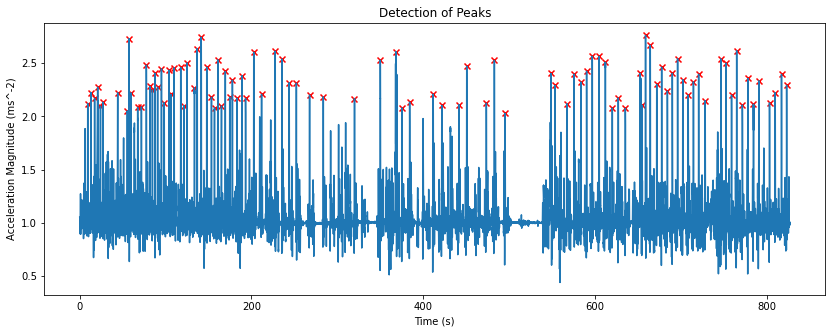

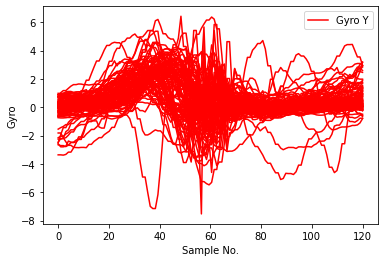

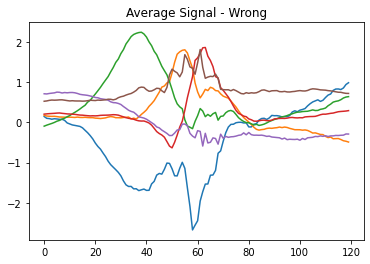

(120, 6)


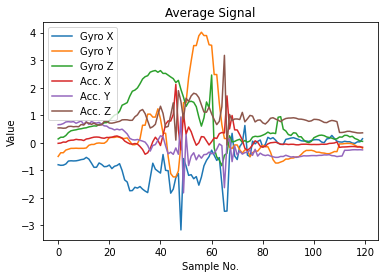

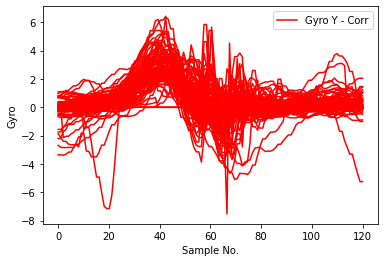

Drive
76


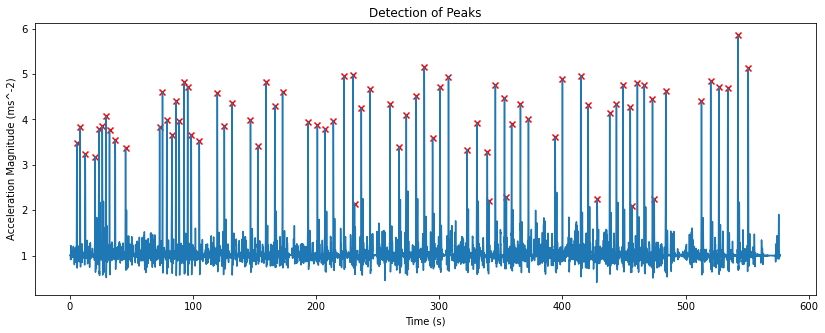

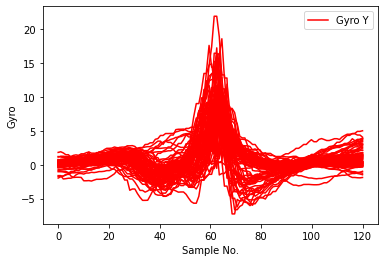

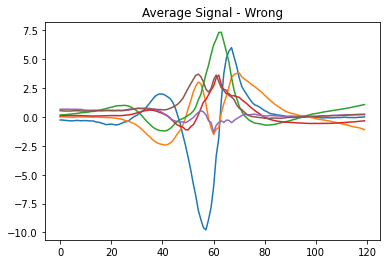

(120, 6)


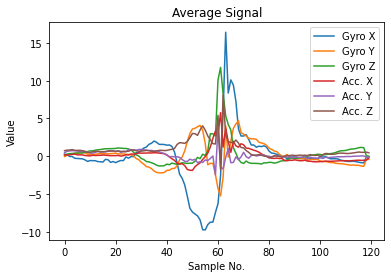

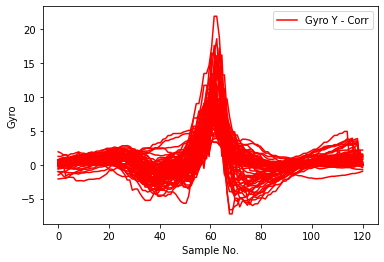

Cut
76


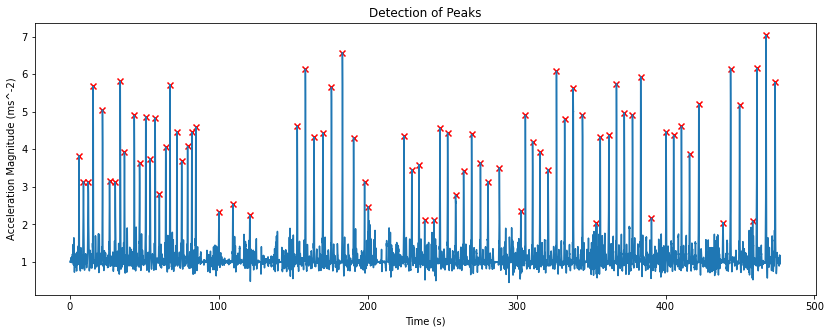

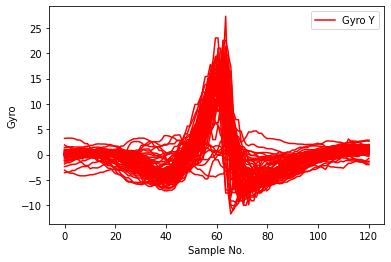

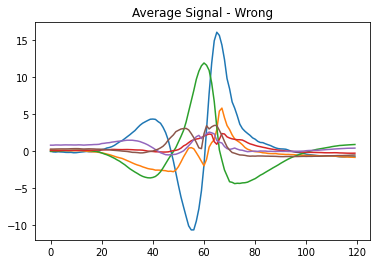

(120, 6)


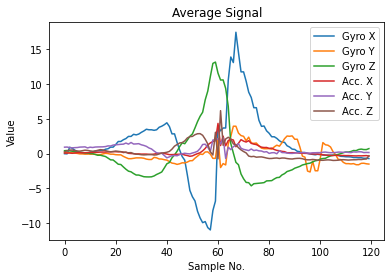

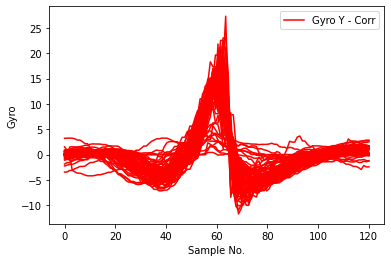

Pull
52


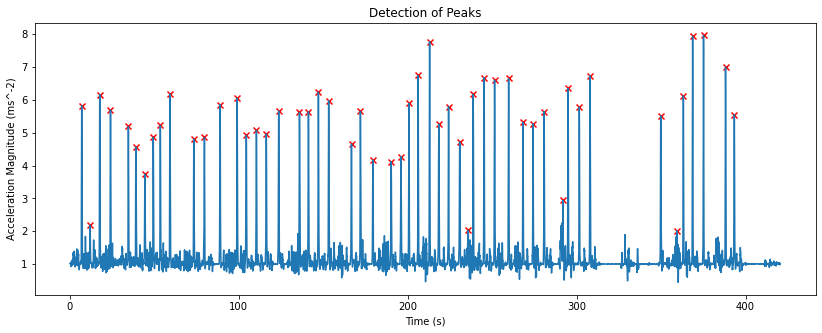

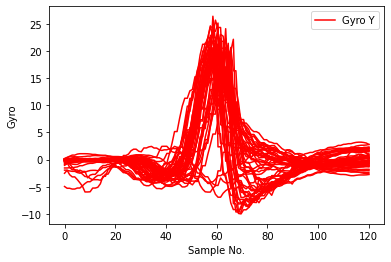

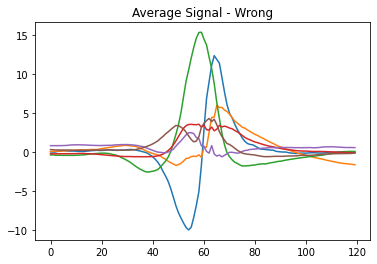

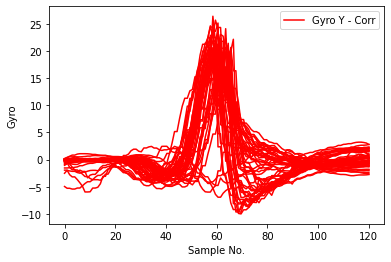

Sweep
57


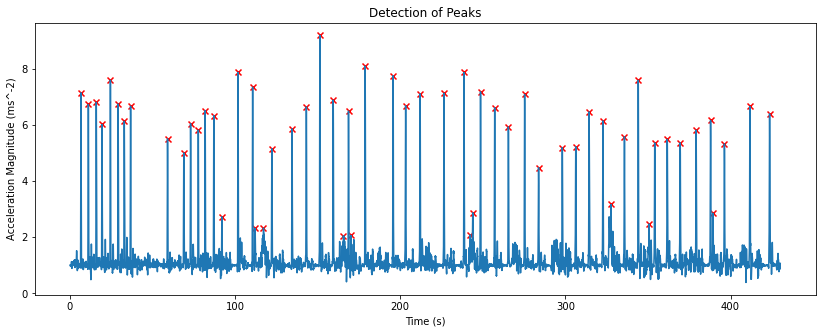

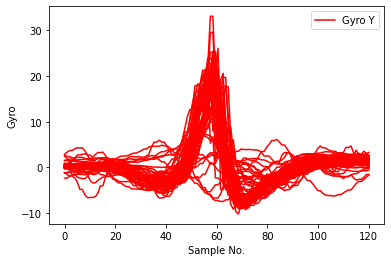

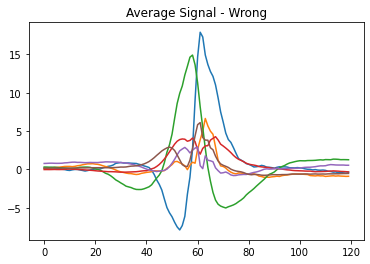

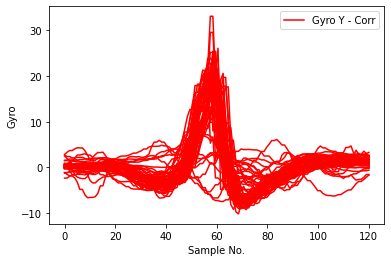

In [115]:
###############################################################################################
# CALLING FUNCTIONS AND MANIPULATING DATA FOR ALGORITHM INPUT 
###############################################################################################

###############################################################################################
# CALLING DETECTION FUNCTION FOR EACH CLASS
###############################################################################################

SignalXA_def, SignalYA_def, SignalZA_def, SignalXG_def, SignalYG_def, SignalZG_def, SignalGraph_def, SignalTime_def, num_def, template_def, GravityX_def, GravityY_def, GravityZ_def = detection(def_dan, 'Defensive')
SignalXA_drv, SignalYA_drv, SignalZA_drv, SignalXG_drv, SignalYG_drv, SignalZG_drv, SignalGraph_drv, SignalTime_drv, num_drv, template_drv, GravityX_drv, GravityY_drv, GravityZ_drv = detection(drive_dan, 'Drive')
SignalXA_cut, SignalYA_cut, SignalZA_cut, SignalXG_cut, SignalYG_cut, SignalZG_cut, SignalGraph_cut, SignalTime_cut, num_cut, template_cut, GravityX_cut, GravityY_cut, GravityZ_cut = detection(cut_dan, 'Cut')
SignalXA_pll, SignalYA_pll, SignalZA_pll, SignalXG_pll, SignalYG_pll, SignalZG_pll, SignalGraph_pll, SignalTime_pll, num_pll, template_pll, GravityX_pll, GravityY_pll, GravityZ_pll = detection(pull_dan, 'Pull')
SignalXA_swp, SignalYA_swp, SignalZA_swp, SignalXG_swp, SignalYG_swp, SignalZG_swp, SignalGraph_swp, SignalTime_swp, num_swp, template_swp, GravityX_swp, GravityY_swp, GravityZ_swp = detection(sweep_dan, 'Sweep')


###############################################################################################
# CALLING FEATURES FUNCTION FOR EACH CLASS
###############################################################################################

MinA_def, MinG_def, MaxA_def, MaxG_def, MeanA_def, MeanG_def, IntA_def, IntG_def, StdA_def, StdG_def, signG_def, signA_def = features(SignalXA_def, SignalYA_def, SignalZA_def, SignalXG_def, SignalYG_def, SignalZG_def, num_def)
MinA_drv, MinG_drv, MaxA_drv, MaxG_drv, MeanA_drv, MeanG_drv, IntA_drv, IntG_drv, StdA_drv, StdG_drv, signG_drv, signA_drv = features(SignalXA_drv, SignalYA_drv, SignalZA_drv, SignalXG_drv, SignalYG_drv, SignalZG_drv, num_drv)
MinA_cut, MinG_cut, MaxA_cut, MaxG_cut, MeanA_cut, MeanG_cut, IntA_cut, IntG_cut, StdA_cut, StdG_cut, signG_cut, signA_cut = features(SignalXA_cut, SignalYA_cut, SignalZA_cut, SignalXG_cut, SignalYG_cut, SignalZG_cut, num_cut)
MinA_pll, MinG_pll, MaxA_pll, MaxG_pll, MeanA_pll, MeanG_pll, IntA_pll, IntG_pll, StdA_pll, StdG_pll, signG_pll, signA_pll = features(SignalXA_pll, SignalYA_pll, SignalZA_pll, SignalXG_pll, SignalYG_pll, SignalZG_pll, num_pll)
MinA_swp, MinG_swp, MaxA_swp, MaxG_swp, MeanA_swp, MeanG_swp, IntA_swp, IntG_swp, StdA_swp, StdG_swp, signG_swp, signA_swp = features(SignalXA_swp, SignalYA_swp, SignalZA_swp, SignalXG_swp, SignalYG_swp, SignalZG_swp, num_swp)


###############################################################################################
# STACKING FEATURES INTO ONE ARRAY FOR EACH CLASS
###############################################################################################

Full_def = np.column_stack([MinA_def, MinG_def, MaxA_def, MaxG_def, MeanA_def, MeanG_def, IntA_def, IntG_def, StdA_def, StdG_def, signG_def, signA_def])
Full_drv = np.column_stack([MinA_drv, MinG_drv, MaxA_drv, MaxG_drv, MeanA_drv, MeanG_drv, IntA_drv, IntG_drv, StdA_drv, StdG_drv, signG_drv, signA_drv])
Full_cut = np.column_stack([MinA_cut, MinG_cut, MaxA_cut, MaxG_cut, MeanA_cut, MeanG_cut, IntA_cut, IntG_cut, StdA_cut, StdG_cut, signG_cut, signA_cut])
Full_pll = np.column_stack([MinA_pll, MinG_pll, MaxA_pll, MaxG_pll, MeanA_pll, MeanG_pll, IntA_pll, IntG_pll, StdA_pll, StdG_pll, signG_pll, signA_pll])
Full_swp = np.column_stack([MinA_swp, MinG_swp, MaxA_swp, MaxG_swp, MeanA_swp, MeanG_swp, IntA_swp, IntG_swp, StdA_swp, StdG_swp, signG_swp, signA_swp])


In [124]:
###############################################################################################
# FUNCTION TO EVALUATE PERFORMANCE METRICS 
###############################################################################################

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx


def performance_metrics(SignalXA, SignalYA, SignalZA, SignalXG, SignalYG, SignalZG, num, template, annotation, GravityX, GravityY, GravityZ):

    # 1. Bat Speed

    M = len(SignalYG[0,:])
    N = len(SignalYG[:,0])
    print(str(annotation) + ': ' + str(M) + ' shots')

    g_y_max =  np.zeros(M)
    g_z_max =  np.zeros(M)

    for j in range(0,M):
        g_y_max[j] = np.max(abs(SignalYG[:,j]))
        g_z_max[j] = np.max(abs(SignalZG[:,j]))


    g_y_max_av = np.mean(g_y_max)
    g_z_max_av = np.mean(g_z_max)
    omega = ((g_y_max_av)**2 + (g_z_max_av)**2)**(1/2)

    BatSpeedAverage = omega*0.769 # answer in m/s
    print('Bat Speed: ' + str(BatSpeedAverage) + ' m/s')


    
    # 2. Shot quality

    consistency_gyroX = np.zeros(M)
    consistency_gyroY = np.zeros(M)
    consistency_gyroZ = np.zeros(M)
    consistency_accelX = np.zeros(M)
    consistency_accelY = np.zeros(M)
    consistency_accelZ = np.zeros(M)

    for j in range(0,M):
        for i in range(0,N):

            consistency_gyroX[j] = consistency_gyroX[j] + (((SignalXG[i,j])-template[i,0])**2)**(1/2)
            consistency_gyroY[j] = consistency_gyroY[j] + (((SignalYG[i,j])-template[i,1])**2)**(1/2)
            consistency_gyroZ[j] = consistency_gyroZ[j] + (((SignalZG[i,j])-template[i,2])**2)**(1/2)
            consistency_accelX[j] = consistency_accelX[j] + (((SignalXA[i,j])-template[i,3])**2)**(1/2)
            consistency_accelY[j] = consistency_accelY[j] + (((SignalYA[i,j])-template[i,4])**2)**(1/2)
            consistency_accelZ[j] = consistency_accelZ[j] + (((SignalZA[i,j])-template[i,5])**2)**(1/2)


    minxg = np.min(consistency_gyroX)
    maxxg = np.max(consistency_gyroX)
    consistency_gyroX = ((consistency_gyroX-minxg)/(maxxg-minxg))*5 + 5
    minyg = np.min(consistency_gyroY)
    maxyg = np.max(consistency_gyroY)
    consistency_gyroY = ((consistency_gyroY-minyg)/(maxyg-minyg))*5 + 5
    minzg = np.min(consistency_gyroZ)
    maxzg = np.max(consistency_gyroZ)
    consistency_gyroZ = ((consistency_gyroZ-minzg)/(maxzg-minzg))*5 + 5
    minxa = np.min(consistency_accelX)
    maxxa = np.max(consistency_accelX)
    consistency_accelX = ((consistency_accelX-minxa)/(maxxa-minxa))*5 + 5
    minya = np.min(consistency_accelY)
    maxya = np.max(consistency_accelY)
    consistency_accelY = ((consistency_accelY-minya)/(maxya-minya))*5 + 5
    minza = np.min(consistency_accelZ)
    maxza = np.max(consistency_accelZ)
    consistency_accelZ = ((consistency_accelZ-minza)/(maxza-minza))*5 + 5

    
    consistency_total = np.zeros(6)
    consistency_total[0] = np.mean(consistency_gyroX[:])
    consistency_total[1] = np.mean(consistency_gyroY[:])
    consistency_total[2] = np.mean(consistency_gyroZ[:])
    consistency_total[3] = np.mean(consistency_accelX[:])
    consistency_total[4] = np.mean(consistency_accelY[:])
    consistency_total[5] = np.mean(consistency_accelZ[:])
    
    
    print('Gyro X Shot Quality: ' + str(consistency_gyroX_total) + ' / 10')
    print('Gyro Y Shot Quality: ' + str(consistency_gyroY_total) + ' / 10')
    print('Gyro Z Shot Quality: ' + str(consistency_gyroZ_total) + ' / 10')
    print('Accel X Shot Quality: ' + str(consistency_accelX_total) + ' / 10')
    print('Accel Y Shot Quality: ' + str(consistency_accelY_total) + ' / 10')
    print('Accel Z Shot Quality: ' + str(consistency_accelZ_total) + ' / 10')

    
    ShotQuality = np.mean(consistency_total)
    print('Average Shot Quality: ' + str(ShotQuality) + ' / 10')
    
    
    
    # 3. Bat Lift Angles
    
    # Initial Bat Angle
    
    initialangles_lookup = np.arange(45,180,0.1) # All possible angles in increments of 0.1 degrees
    
    no_init = len(initialangles_lookup)
    yvals = np.linspace(0.1,1,no_init)
    
    initialangles = np.zeros(M)
    impactangles = np.zeros(M)
    
    for j in range(0,M):
    
        index = find_nearest(yvals, GravityY[0,j]) # Only interested in the y value of the gravity vector
        initialangles[j] = initialangles_lookup[index]
        
        
    InitialAngle = np.mean(initialangles)

    
    # Impact Bat Angle - Different for each shot
    
    if annotation == 'Defensive':
        
        impactangles_lookup = np.arange(-10,45,0.1) # NEEDS CHANGING
        
        no_imp_def = len(impactangles_lookup)
        yvals = np.linspace(0.9,0.8,no_imp_def) # NEEDS CHANGING
        
        for j in range(0,M):
    
            index = find_nearest(yvals, GravityY[60,j]) # Only interested in the y value of the gravity vector
            impactangles[j] = impactangles_lookup[index]
        
        ImpactAngle = np.mean(impactangles)
        
        
    if annotation == 'Drive':
        
        impactangles_lookup = np.arange(-45,45,0.1) # NEEDS CHANGING
        
        no_imp_def = len(impactangles_lookup)
        yvals = np.linspace(0.9,0.8,no_imp_def) # NEEDS CHANGING
        
        for j in range(0,M):
    
            index = find_nearest(yvals, GravityY[60,j]) # Only interested in the y value of the gravity vector
            impactangles[j] = impactangles_lookup[index]
        
        ImpactAngle = np.mean(impactangles)
        
        
    if annotation == 'Cut':
        
        impactangles_lookup = np.arange(45,160,0.1) # NEEDS CHANGING
        
        no_imp_def = len(impactangles_lookup)
        yvals = np.linspace(0.5,0.1,no_imp_def) # NEEDS CHANGING
        
        for j in range(0,M):
    
            index = find_nearest(yvals, GravityZ[60,j]) # Only interested in the y value of the gravity vector
            impactangles[j] = impactangles_lookup[index]
        
        ImpactAngle = np.mean(impactangles)
        
        
    if annotation == 'Pull':
        
        impactangles_lookup = np.arange(45,160,0.1) # NEEDS CHANGING
        
        no_imp_def = len(impactangles_lookup)
        yvals = np.linspace(0.5,1,no_imp_def) # NEEDS CHANGING
        
        for j in range(0,M):
    
            index = find_nearest(yvals, GravityZ[60,j]) # Only interested in the y value of the gravity vector
            impactangles[j] = impactangles_lookup[index]
        
        ImpactAngle = np.mean(impactangles)
        
        
    if annotation == 'Sweep':
        
        impactangles_lookup = np.arange(45,160,0.1) # NEEDS CHANGING
        
        no_imp_def = len(impactangles_lookup)
        yvals = np.linspace(0.5,1,no_imp_def) # NEEDS CHANGING
        
        for j in range(0,M):
    
            index = find_nearest(yvals, GravityZ[60,j]) # Only interested in the y value of the gravity vector
            impactangles[j] = impactangles_lookup[index]
        
        ImpactAngle = np.mean(impactangles)
    
    
    
    plt.plot(GravityX[:,0])
    plt.plot(GravityY[:,0])
    plt.plot(GravityZ[:,0])
    plt.title('Gravity Signal')
    plt.legend(['Gravity X','Gravity Y','Gravity Z'])
    plt.show()
    
    
    print('Initial Bat Angle: ' + str(InitialAngle))
    print('Impact Bat Angle: ' + str(ImpactAngle))
    
    print('')
    
    return BatSpeedAverage, ShotQuality, InitialAngle, ImpactAngle


Defensive: 97 shots
Bat Speed: 4.211867908193236 m/s
Gyro X Shot Quality: 7.23960366342186 / 10
Gyro Y Shot Quality: 6.166155902223008 / 10
Gyro Z Shot Quality: 7.085322873148628 / 10
Accel X Shot Quality: 6.032791194258552 / 10
Accel Y Shot Quality: 6.973847369835967 / 10
Accel Z Shot Quality: 6.704696696721233 / 10
Average Shot Quality: 6.031468525010222 / 10


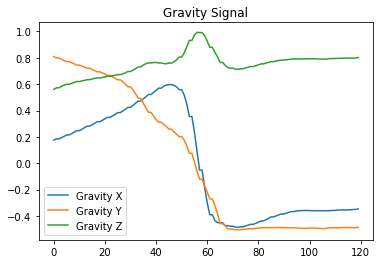

Initial Bat Angle: 146.45257731958907
Impact Bat Angle: 43.768041237113216

Drive: 76 shots
Bat Speed: 9.115487241028816 m/s
Gyro X Shot Quality: 7.23960366342186 / 10
Gyro Y Shot Quality: 6.166155902223008 / 10
Gyro Z Shot Quality: 7.085322873148628 / 10
Accel X Shot Quality: 6.032791194258552 / 10
Accel Y Shot Quality: 6.973847369835967 / 10
Accel Z Shot Quality: 6.704696696721233 / 10
Average Shot Quality: 6.700402949934875 / 10


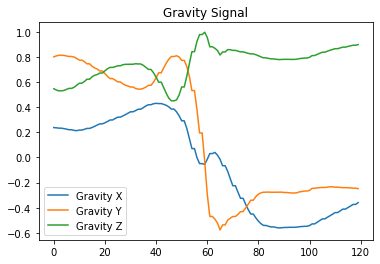

Initial Bat Angle: 135.81184210526445
Impact Bat Angle: 44.90000000000129

Cut: 76 shots
Bat Speed: 13.223279127247991 m/s
Gyro X Shot Quality: 7.23960366342186 / 10
Gyro Y Shot Quality: 6.166155902223008 / 10
Gyro Z Shot Quality: 7.085322873148628 / 10
Accel X Shot Quality: 6.032791194258552 / 10
Accel Y Shot Quality: 6.973847369835967 / 10
Accel Z Shot Quality: 6.704696696721233 / 10
Average Shot Quality: 6.9712924238349565 / 10


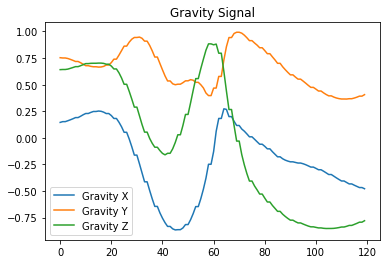

Initial Bat Angle: 157.96578947368582
Impact Bat Angle: 60.057894736842314

Pull: 52 shots
Bat Speed: 17.391975542134567 m/s
Gyro X Shot Quality: 7.23960366342186 / 10
Gyro Y Shot Quality: 6.166155902223008 / 10
Gyro Z Shot Quality: 7.085322873148628 / 10
Accel X Shot Quality: 6.032791194258552 / 10
Accel Y Shot Quality: 6.973847369835967 / 10
Accel Z Shot Quality: 6.704696696721233 / 10
Average Shot Quality: 7.266012366728018 / 10


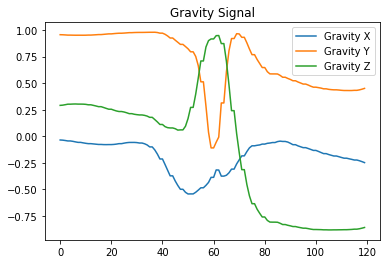

Initial Bat Angle: 156.96923076923235
Impact Bat Angle: 112.55192307692404

Sweep: 57 shots
Bat Speed: 16.634368692299336 m/s
Gyro X Shot Quality: 7.23960366342186 / 10
Gyro Y Shot Quality: 6.166155902223008 / 10
Gyro Z Shot Quality: 7.085322873148628 / 10
Accel X Shot Quality: 6.032791194258552 / 10
Accel Y Shot Quality: 6.973847369835967 / 10
Accel Z Shot Quality: 6.704696696721233 / 10
Average Shot Quality: 6.99236317905837 / 10


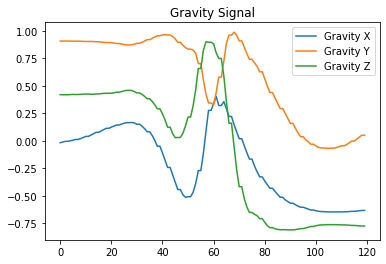

Initial Bat Angle: 156.7421052631595
Impact Bat Angle: 88.86315789473744



In [125]:
###############################################################################################
# CALLING PERFORMANCE METRICS FUNCTION FOR EACH CLASS
###############################################################################################

Speed_def, Quality_def, InitialAngle_def, ImpactAngle_def = performance_metrics(SignalXA_def, SignalYA_def, SignalZA_def, SignalXG_def, SignalYG_def, SignalZG_def, num_def, template_def, 'Defensive', GravityX_def, GravityY_def, GravityZ_def)
Speed_drv, Quality_drv, InitialAngle_drv, ImpactAngle_drv = performance_metrics(SignalXA_drv, SignalYA_drv, SignalZA_drv, SignalXG_drv, SignalYG_drv, SignalZG_drv, num_drv, template_drv, 'Drive', GravityX_drv, GravityY_drv, GravityZ_drv)
Speed_cut, Quality_cut, InitialAngle_cut, ImpactAngle_cut = performance_metrics(SignalXA_cut, SignalYA_cut, SignalZA_cut, SignalXG_cut, SignalYG_cut, SignalZG_cut, num_cut, template_cut, 'Cut', GravityX_cut, GravityY_cut, GravityZ_cut)
Speed_pll, Quality_pll, InitialAngle_pll, ImpactAngle_pll = performance_metrics(SignalXA_pll, SignalYA_pll, SignalZA_pll, SignalXG_pll, SignalYG_pll, SignalZG_pll, num_pll, template_pll, 'Pull', GravityX_pll, GravityY_pll, GravityZ_pll)
Speed_swp, Quality_swp, InitialAngle_swp, ImpactAngle_swp = performance_metrics(SignalXA_swp, SignalYA_swp, SignalZA_swp, SignalXG_swp, SignalYG_swp, SignalZG_swp, num_swp, template_swp, 'Sweep', GravityX_swp, GravityY_swp, GravityZ_swp)

In [118]:
#######################################################################
# CLASSIFICATION ALGORITHM
#######################################################################

# Stack all shots 
Total = np.vstack([Full_def, Full_drv, Full_cut, Full_pll, Full_swp])
print(Total.shape)

# Setting up classification array for training
y = np.zeros(len(Total[:,0]))
y[num_def:num_drv+num_def] = 1
y[num_drv+num_def:num_cut+num_drv+num_def] = 2
y[num_cut+num_drv+num_def:num_pll+num_cut+num_drv+num_def] = 3
y[num_pll+num_cut+num_drv+num_def:len(Total[:,0])] = 4


# Standardise Data
means = np.mean(Total);
stds = np.std(Total);
X = (Total-means)/stds


# Splitting the dataset to Train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


# Fitting the training data using a Support Vector Machine
svm = SVC(C=1.52, gamma='auto', kernel='rbf')
svm.fit(X_train, y_train)


# Testing the model using X_train and storing the output in y_pred_train
y_pred_train = svm.predict(X_train)
# Testing the model using X_test and storing the output in y_pred_train
y_pred_test = svm.predict(X_test)

print(y_test)
print(y_pred_test)


print(f"Training Accuracy: {accuracy_score(y_train, y_pred_train) * 100:.2f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred_test) * 100:.2f}%")

(358, 36)
[0. 3. 1. 2. 0. 1. 2. 0. 0. 1. 0. 3. 1. 3. 1. 3. 1. 1. 0. 3. 2. 2. 0. 1.
 2. 3. 0. 0. 0. 1. 3. 3. 0. 0. 0. 0. 1. 3. 2. 1. 0. 2. 3. 2. 2. 3. 2. 0.
 0. 4. 3. 1. 2. 2. 0. 0. 2. 3. 3. 2. 0. 1. 1. 0. 2. 1. 4. 2. 3. 2. 0. 1.
 3. 4. 4. 3. 0. 1. 1. 0. 1. 1. 4. 4. 3. 4. 0. 3. 0. 1.]
[0. 3. 1. 2. 0. 1. 2. 0. 0. 1. 0. 3. 1. 3. 1. 4. 1. 1. 0. 4. 2. 2. 0. 1.
 2. 3. 0. 0. 0. 1. 3. 3. 0. 0. 0. 0. 1. 3. 2. 1. 0. 2. 3. 2. 2. 4. 2. 0.
 0. 4. 4. 1. 2. 2. 0. 0. 2. 3. 3. 2. 0. 1. 1. 0. 2. 1. 3. 2. 4. 2. 0. 1.
 3. 4. 4. 3. 0. 1. 1. 0. 1. 1. 4. 4. 4. 4. 0. 3. 0. 1.]
Training Accuracy: 95.15%
Testing Accuracy: 92.22%


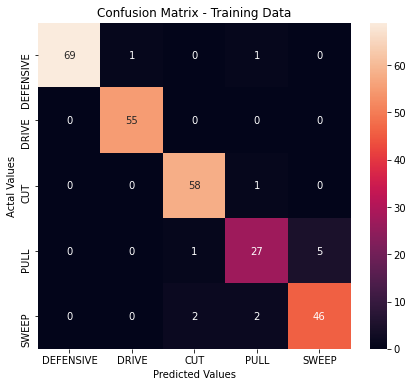

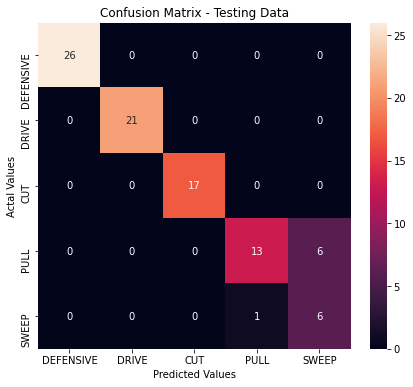

In [119]:
#######################################################################
# DEVELOPING CONFUSION MATRICES
#######################################################################

# Creating a confusion matrix,which compares the y_train and y_pred_train
cm_train = confusion_matrix(y_train, y_pred_train)
# Creating a dataframe for a array-formatted Confusion matrix, easier for plotting
cm_train_df = pd.DataFrame(cm_train, index = ['DEFENSIVE','DRIVE','CUT', 'PULL', 'SWEEP'], columns = ['DEFENSIVE','DRIVE','CUT', 'PULL', 'SWEEP'])

#Plotting the confusion matrix
plt.figure(figsize=(7,6))
sns.heatmap(cm_train_df, annot=True)
plt.title('Confusion Matrix - Training Data')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()



# Creating  a confusion matrix,which compares the y_test and y_pred_test
cm = confusion_matrix(y_test, y_pred_test)
# Creating a dataframe for a array-formatted Confusion matrix, easier for plotting
cm_df = pd.DataFrame(cm, index = ['DEFENSIVE','DRIVE','CUT', 'PULL', 'SWEEP'], columns = ['DEFENSIVE','DRIVE','CUT', 'PULL', 'SWEEP'])

#Plotting the confusion matrix
plt.figure(figsize=(7,6))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix - Testing Data')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


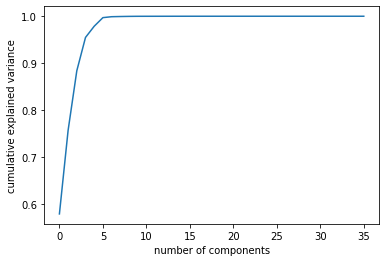

In [120]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

6
[13.82320243  4.25712742  3.03197594  1.69605398  0.57023488  0.4377767 ]
[0.57868156 0.17821638 0.12692779 0.07100201 0.02387178 0.01832667]


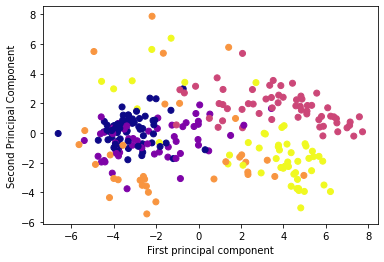

In [121]:
#######################################################################
# RUNNING PCA TO REDUCE DIMENSIONALITY AND THEN RE-TRAINING ALGORITHM
#######################################################################

# Finding number of principal components that amount of 99% variance 
# pca = PCA(n_components=5)
pca = PCA(0.99)
# pca.fit(X_train)


# Fit the model with X_train and apply the dimensionality reduction on it
X_train = pca.fit_transform(X_train)
# Apply dimensionality reduction to X
X_test = pca.transform(X_test)


# Print number of components
comp = pca.n_components_
print(comp)

# Print the percentage split of top n principal components
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)


plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

Training Accuracy: 92.16%
Testing Accuracy: 86.67%


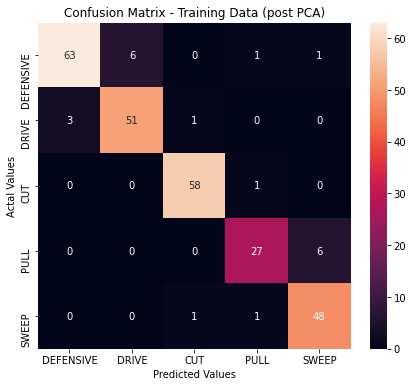

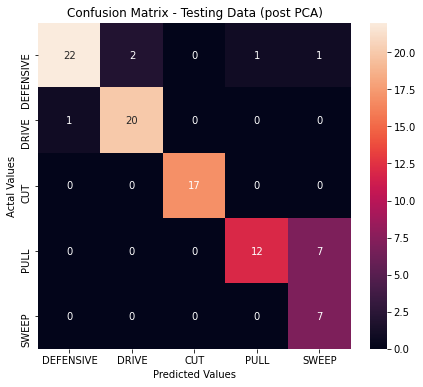

In [25]:
# Fitting the training data using a Support Vector Machine - Post PCA
svm = SVC(C=0.48, gamma='auto', kernel='rbf')
svm.fit(X_train, y_train)

y_pred_train = svm.predict(X_train)
# Testing the model using X_test and storing the output in y_pred
y_pred_test = svm.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, y_pred_train) * 100:.2f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred_test) * 100:.2f}%")


#######################################################################
# DEVELOPING CONFUSION MATRICES
#######################################################################

# Creating a confusion matrix,which compares the y_train and y_pred_train
cm_train = confusion_matrix(y_train, y_pred_train)
# Creating a dataframe for a array-formatted Confusion matrix, easier for plotting
cm_train_df = pd.DataFrame(cm_train, index = ['DEFENSIVE','DRIVE','CUT', 'PULL', 'SWEEP'], columns = ['DEFENSIVE','DRIVE','CUT', 'PULL', 'SWEEP'])

#Plotting the confusion matrix
plt.figure(figsize=(7,6))
sns.heatmap(cm_train_df, annot=True)
plt.title('Confusion Matrix - Training Data (post PCA)')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


# Creating  a confusion matrix,which compares the y_test and y_pred_test
cm = confusion_matrix(y_test, y_pred_test)
# Creating a dataframe for a array-formatted Confusion matrix, easier for plotting
cm_df = pd.DataFrame(cm, index = ['DEFENSIVE','DRIVE','CUT', 'PULL', 'SWEEP'], columns = ['DEFENSIVE','DRIVE','CUT', 'PULL', 'SWEEP'])

#Plotting the confusion matrix
plt.figure(figsize=(7,6))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix - Testing Data (post PCA)')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


[ 0.03162278  0.04281332  0.05796394  0.078476    0.10624678  0.14384499
  0.1947483   0.26366509  0.35696988  0.48329302  0.65431891  0.88586679
  1.19935395  1.62377674  2.19839265  2.97635144  4.02961132  5.45559478
  7.38619982 10.        ]
Correct percentage for test data:  83.80281690140843
Correct percentage for training data:  85.54445554445553
Correct percentage for test data:  87.42957746478874
Correct percentage for training data:  87.64187032479715
Correct percentage for test data:  88.26682316118936
Correct percentage for training data:  88.61674910455399
Correct percentage for test data:  89.08450704225352
Correct percentage for training data:  90.01388855047392
Correct percentage for test data:  88.8302034428795
Correct percentage for training data:  91.2716551740942
Correct percentage for test data:  90.77856025039122
Correct percentage for training data:  92.10959771935383
Correct percentage for test data:  91.07589984350547
Correct percentage for training data:  93.01

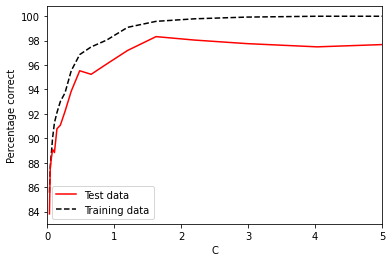

In [26]:
# K Fold Cross Validation 
# Same as above but put into a loop and graphing C against accuracy

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True)

# Array for various C values
C_array = np.power(10, np.linspace(-1.5, 1, 20))
# C_array = np.linspace(1,20,20)
print(C_array)
nC = len(C_array)

# Creating array for test and train accuracies for the various C values
test_cor_array = np.zeros([nC,1])
train_cor_array = np.zeros([nC,1])


for cCnt in range(nC):
  
    
    tot_correct_fraction_test = 0
    tot_correct_fraction_train = 0
    
    for train_index, test_index in kf.split(X):
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]

        #use X_train, y_train to train the SVM
        svm = SVC(C=C_array[cCnt], gamma='auto', kernel='linear')

        svm.fit(X_train,y_train)

        #use svm.predict() to predict the output for the test data set
        y_test_model = svm.predict(X_test)

        #loop through to compare the test data output to what it should be and obtain the fraction of correct classifications
        nTot = len(y_test) 
        nMatch = 0 
        for i in range(len(y_test)):
            if y_test[i] == y_test_model[i]:
                nMatch += 1
    
        correct_fraction_test = nMatch / nTot

        #do the same prediction and performance assessment performance with the training data
        y_train_model = svm.predict(X_train)

        nTot = len(y_train) 
        nMatch = 0
        for i in range(len(y_train)):
            if y_train[i] == y_train_model[i]:
                nMatch += 1

        correct_fraction_train = nMatch / nTot
    
        # add on to the totals
        tot_correct_fraction_test += correct_fraction_test
        tot_correct_fraction_train += correct_fraction_train

    print('Correct percentage for test data: ', 100*tot_correct_fraction_test/n_splits)
    print('Correct percentage for training data: ', 100*tot_correct_fraction_train/n_splits)
  
    test_cor_array[cCnt] = 100*tot_correct_fraction_test/n_splits
    train_cor_array[cCnt] = 100*tot_correct_fraction_train/n_splits  


plt.figure()
line_train, = plt.plot(C_array,train_cor_array,'k--', label = 'Training data')
line_test, = plt.plot(C_array,test_cor_array,'r-',label='Test data')
#line_train, = plt.semilogx(C_array,train_cor_array,'k--', label = 'Training data')
#line_test, = plt.semilogx(C_array,test_cor_array,'r-',label='Test data')
plt.xlabel('C')
plt.ylabel('Percentage correct')
plt.xlim(0,5)
plt.legend(handles=[line_test, line_train])